2023-10-09 12:51:20.447 | INFO     | __main__:data_preload:25 - LSUN/churches-train data preload start
100%|██████████| 64/64 [00:00<00:00, 22921.65it/s]
2023-10-09 12:51:20.461 | INFO     | __main__:data_preload:45 - LSUN/churches-train data preload done


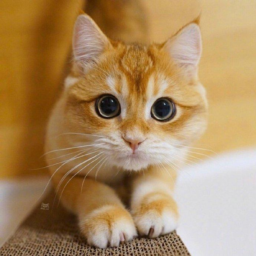

In [8]:
import os
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from loguru import logger
from tqdm import tqdm
import numpy as np
from PIL import Image

base_path="/home/yang/sda/github/fuzzydiffusion/"

class LSUN(Dataset):
    def __init__(self, dataset_path, dataset_sub_path='', phase='train', transform=None, target_transform=None):
        self.dataset_path = dataset_path
        self.dataset_sub_path = dataset_sub_path
        self.dataset = None
        self.phase = phase # train validation test
        self.data_len = 0
        self.data_pairs = []
        self.transform = transform
        self.target_transform = target_transform
        self.data_preload()
    
    def data_preload(self):
        logger.info(f"LSUN/{self.dataset_sub_path}-{self.phase} data preload start")
        sub_map = {"churches":"church_outdoor", "cats":"cat", "bedrooms":"bedrooms"}
        img_txt_name = sub_map[self.dataset_sub_path]+'_'+self.phase+".txt"
        img_txt_path = base_path+"output/datasets/lsun/"+img_txt_name
        if not os.path.exists(img_txt_path):
            logger.error(f"{img_txt_path} not exists")
            return
        fd = open(img_txt_path, "r")
        lines = fd.readlines()
        self.data_len = 64 #len(lines)
        data_pairs = np.empty([self.data_len], dtype=int).tolist()
        for i in tqdm(range(self.data_len)):
            img_path = base_path+"output/datasets/lsun/"+self.dataset_sub_path+'/'+ lines[i].replace('\n', '')
            if not os.path.exists(img_path):
                logger.error(f"{img_path} not exists")
                return
            img = Image.open(img_path)
            text = ''
            data_pairs[i] = [img, text]
        self.data_pairs = data_pairs
        logger.info(f"LSUN/{self.dataset_sub_path}-{self.phase} data preload done")
    
    def __len__(self):
        return self.data_len

    def __getitem__(self, idx):
        img,text = self.data_pairs[idx]
        if self.transform:
            img = self.transform(img)
        return img, text

dataset = LSUN('lsun', 'churches','train', transform=transforms.Compose([
        transforms.Resize((32,32)),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]))

train_data = DataLoader(
    dataset, batch_size=8, shuffle=True, drop_last=True, pin_memory=True)

img_path = "/home/yang/sda/github/fuzzydiffusion/doc/cat.jpg"
resize = transforms.Resize([256,256])
ToTensor = transforms.ToTensor()
ToImg = transforms.ToPILImage()
img = Image.open(img_path)
img = resize(img)
img_tensor = ToTensor(img)
img = ToImg(img_tensor)
img.show()

# for image,text in train_data:
#     # image = image.to("cuda")
#     # image = image.to('cpu')
#     img = tensor_to_img(image[0])
#     img.show()